# Assignment 2
### Learning Outcomes 
By completing this assignment, you will gain and demonstrate skills relating to 
- working within the python environment  
- visualizing of numerical data continued 
- tabulation and plotting of discrete data 
- Calculating joint, marginal, and conditional probabilities  
- Summarizing and plotting numerical data by group 

### Problem Description
As a data scientist for a Hollywood investment company you have been charged with creating a summary of the last 250 movies so that your boss can have a deeper understanding of the movie industry. The dataset that you will be working with includes 8 different variables: 
- North American box office revenue  
- Cost to produce the movie 
- Income of the director 
- Gender of the director 
- Year of release 
- Month of release 
- Movie genre 
- Number of theaters at release 

Unless otherwise stated, you are encouraged to use numpy, pandas, and matplotlib methods (e.g., mean, etc.). 

In this homework, you are expected to read portions of the Python for Data Analysis textbook. To help you not get lost, we will point you to the relevant book section for the various tasks. However, you may have to go back and read some basics if you realize that you are missing understanding on some foundational concept. 

### Overview of plotting (pg. 219-240)
Read pages 219 to 231 in the Python for Data Analysis book. While we do not assign a specific task, the knowledge gained here will help in completing the tasks in the rest of this homework. In addition, step through this https://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb. It is suggested that you download the notebook and run it locally to fully benefit from the tutorial.  

### Submit via OWL
Use the jupyter notebook provided and fill in your answer in the code cells. Before submitting, please make sure you clear the output prior to submission (Cell Menu -> All Outputs -> Clear ). Submit your notebook file under the file name YourUserID_Assign1.ipynb 

Make sure that you develop your code with Python 3.7 as the interpreter. The TA will not endeavor to fix code that uses earlier versions of Python (e.g. 2.7). Make sure that your code includes all statements that it requires to work properly when calling Cell->Run All. 

### General Marking criteria: 
- Does the program behave according to specifications?
- Are you using appropriate data structures?
- Is the output according to specifications?
- Are all questions answered fully? Written responses must be answered in full English sentences.
- Comments for pieces of code that are longer than few line 
- All figures require axis labels + a caption
- Use Python coding conventions and good programming techniques, for example:
    * meaningful variable names
    * conventions for naming variables and constants
    * Use of constants where appropriate
    * Readability: indention, white space, consistency.

## Task 1: Plotting histograms II (Subplots) (? / 15 points)
In order to set up your notebook environment so it includes figures inline write the following code <br>

import matplotlib <br>
matplotlib.use('TkAgg') <br>
import matplotlib.pyplot as plt <br> 
%matplotlib inline <br>

In [103]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns

### Question1. Load the movieDataset and calculate the new column "profit" as in the previous assignment (? / 2 points)

In [3]:
df = pd.read_csv("movieDataset.csv")
df['profit'] = df['boxoff'] - df['prodcost']
df

,Unnamed: 0,boxoff,prodcost,dirIncome,dirGender,year,month,genre,numTheatres,profit
0,0,88.648583,44.742936,3.393535,male,2012,3,comedy,139.0,43.905646
1,1,145.334924,38.835516,1.134711,female,2014,11,drama,213.0,106.499408
2,2,238.265684,29.532283,2.418883,male,2015,6,other,100.0,208.733401
3,3,212.714742,157.111899,2.034115,male,2014,10,adventure,436.0,55.602844
4,4,120.175461,30.547155,0.963219,female,2012,1,comedy,115.0,89.628307
...,...,...,...,...,...,...,...,...,...,...
245,245,187.231562,72.743712,3.105438,male,2012,12,adventure,366.0,114.487850
246,246,215.713195,136.851707,1.917771,male,2013,7,adventure,285.0,78.861488
247,247,166.827002,50.684470,2.414571,male,2014,1,other,233.0,116.142533
248,248,223.226997,40.103513,2.176928,male,2015,2,drama,489.0,183.123485


### Question2. Generate a new figure with an array of 6 subplots (2 rows and 3 columns recommended, see pages 220-223). In the subplots, provide a histogram for the variables boxoff, prodcost,  dirIncome, release month, year released, profit. For each variable, choose an appropriate number of bins (? / 4 points)

Text(0.5, 1.0, 'Profit')

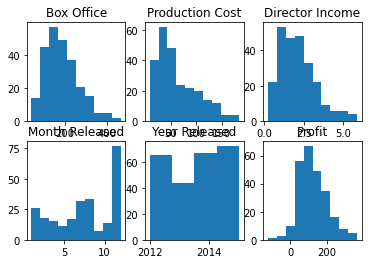

In [12]:
fig, axs = plt.subplots(2,3)
axs[0,0].hist(df['boxoff'])
axs[0,0].set_title('Box Office')
axs[0,1].hist(df['prodcost'])
axs[0,1].set_title('Production Cost')
axs[0,2].hist(df['dirIncome'])
axs[0,2].set_title('Director Income')
axs[1,0].hist(df['month'], bins = 12)
axs[1,0].set_title('Month Released')
axs[1,1].hist(df['year'], bins = 4)
axs[1,1].set_title('Year Released')
axs[1,2].hist(df['profit'])
axs[1,2].set_title('Profit')

Array of Histograms showing Box Office, Production Cost, Director Income, Month Released, Year Released and Profit distribution in the movies dataset.

### Question 3. Written response: Justify the number of bins chosen for each variable. ( ? / 3 points)

For most variables, I did not modify the number of bins as the default setting conveyed enough information without losing much. However, for month and year released, I modified the bins in order to limit it to the 12 months and the 4 years across the dataset.

### Question 4: Describe the shape of the distribution for each variable, including the number of modes and the shape (symmetric, skew, uniform?).  (? / 6 points)

- Box office: unimodal, right-skewed
- Production cost: unimodeal, right-skewed
- Director income: bimodal, right-skewed
- Month released: multimodal, right-skewed (although, since a year is repeated, if it were possible to describe how movies tend to release during winter would be a more accurate description)
- Year released: bimodal, uniform
- Profit: unimodal, symmetric

## Task 2: Tabulating and visualizing categorical data (pg. 24-30 and pg 250-256) (? / 20 points)

### Question1. Create a contingency table of director gender (rows) by genre (columns) without the marginal sums. You may normalize the table by rows or columns. Print to the screen. (? / 4 points)

In [13]:
contingency_table = pd.crosstab(df['dirGender'], df['genre'])
contingency_table

genre,action,adventure,comedy,drama,other
dirGender,,,,,
female,9,6,13,5,4
male,48,58,35,31,41


Contingency table showing the counts of director gender in various movie genres

### Question2. Plot the genre counts by director gender as a grouped bar chart (? / 3 points)

<AxesSubplot:xlabel='dirGender'>

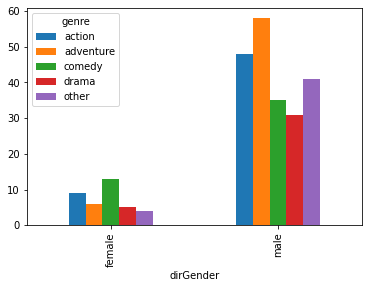

In [16]:
contingency_table.plot.bar()

Grouped bar chart of movie genres grouped by director gender

### Question3. Make a Figure with 2 subplots. Plot the genre counts by director gender as a grouped barplot in one subplot, and as a stacked bar chart in the other subplot. (? / 3 points)

array([<AxesSubplot:xlabel='dirGender'>, <AxesSubplot:xlabel='dirGender'>],
      dtype=object)

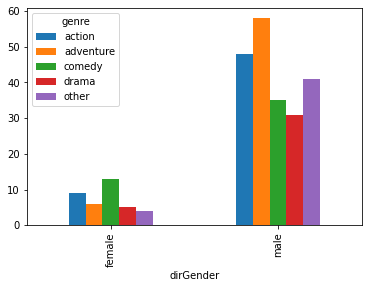

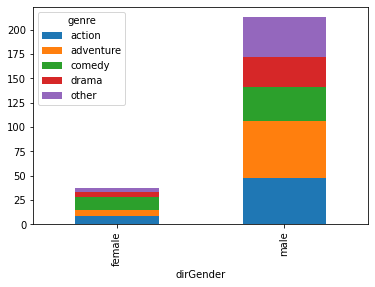

In [43]:
axs[0] = contingency_table.plot.bar()
axs[1] = contingency_table.plot.bar(stacked=True)
axs

Grouped bar chart of movie genres grouped by director gender and stacked bar chart of movie genres grouped by director gender

### Question4. Generate a table of director Gender (rows) and genre (columns), normalized by the row-marginal counts of male and female director, such that you have conditional probabilities of movie genre, given the gender of the director. Print the table and make a stacked barplot. (? / 3 points)

(genre        action  adventure    comedy     drama     other
 dirGender                                                   
 female     0.243243   0.162162  0.351351  0.135135  0.108108
 male       0.225352   0.272300  0.164319  0.145540  0.192488
 All        0.228000   0.256000  0.192000  0.144000  0.180000,
 <AxesSubplot:xlabel='dirGender'>)

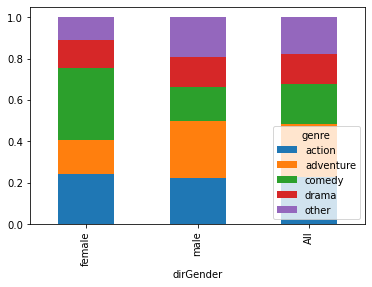

In [51]:
contingency_table1 = pd.crosstab(df['dirGender'], df['genre'], margins = True, normalize = 'index')
contingency_table1, contingency_table1.plot.bar(stacked=True)

Contingency table of director gender across movie genres with row-marginal counts of director gender, and a stacked barplot comparing genre distribution across male, female and all directors.

### Question5. Generate a table of movie genre (rows) and director gender (columns), normalized by the row-marginal counts for each genre, such that you have conditional probabilities of the director gender, given the movie genre.  Print the table and make a stacked barplot. (? / 3 points) (? / 3 points)

(dirGender    female      male
 genre                        
 action     0.157895  0.842105
 adventure  0.093750  0.906250
 comedy     0.270833  0.729167
 drama      0.138889  0.861111
 other      0.088889  0.911111
 All        0.148000  0.852000,
 <AxesSubplot:xlabel='genre'>)

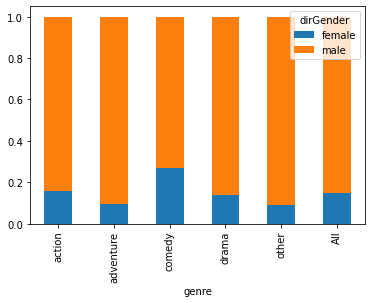

In [56]:
contingency_table2 = pd.crosstab(df['genre'], df['dirGender'], margins = True, normalize = 'index')
contingency_table2, contingency_table2.plot.bar(stacked=True)

Contingency table of director gender across movie genres with row-marginal counts of genre, and a stacked barplot comparing gender distribution across individual and all directors.

### Question6. Written response: Compare the 2 plots from questions 4 and 5. For each plot, describe which aspect of the data can be most readily seen (? / 4 points)

Q4: The range of genres over between female, male and directors in general can be seen best.
Q5: The distribution of director gender in each film genre can be seen best.

## Task 3: Probabilities (? / 20 points)

For each of the questions in this task, you  should show the formula you used to compute the probability. <br>
For each of the tasks in this section, print the answer in a full sentence. For instance, your output should not just be a value but instead: <br>
__Probability of movie being sci-fi given that the gender of the director is male, is 0.602__ <br>
Using the contingency tables, compute and print:

### Question1. The marginal probability of a movie being an action movie (? / 2 points)

In [70]:
print("The marginal probability of a movie being an action movie is " + str(contingency_table1['action']['All']))

The marginal probability of a movie being an action movie is 0.228


### Question2. the marginal probability of a movie being a comedy (? / 2 points)

In [66]:
print("The marginal probability of a movie being an comedy movie is " + str(contingency_table1['comedy']['All']))

The marginal probability of a movie being an comedy movie is 0.192


### Question3. the marginal probability of the director being female (? / 2 points)

In [67]:
print("The marginal probability of the director being female is " + str(contingency_table2['female']['All']))

The marginal probability of the director being female is 0.148


### Question4. the conditional probability of the movie being an action movie given that the director’s gender is female (? / 2 points)

In [74]:
print("The conditional probability of a movie being an action movie given the director is female is " + str(contingency_table1['action']['female']))

The conditional probability of a movie being an action movie given the director is female is 0.24324324324324326


### Question5. the conditional probability of the movie being an action movie given that the director’s gender is male (? / 2 points)

In [71]:
print("The conditional probability of a movie being an action movie given the director is male is " + str(contingency_table1['action']['male']))

The conditional probability of a movie being an action movie given the director is male is 0.22535211267605634


### Question6. the conditional probability of the director’s gender being female given that the movie is an action movie (? / 2 points)

In [75]:
print("The conditional probability of the director being female given the movie is an action movie is " + str(contingency_table2['female']['action']))

The conditional probability of the director being female given the movie is an action movie is 0.15789473684210525


### Question7. the conditional probability of the director’s gender being male knowing that the movie is an action movie (? / 2 points)

In [76]:
print("The conditional probability of the director being male given the movie is an action movie is " + str(contingency_table2['male']['action']))

The conditional probability of the director being male given the movie is an action movie is 0.8421052631578947


### Question8. How does the probability of the director being female change from when you don’t know what the movie is to when you know that the movie is an action movie?  (? / 2 points)

There is an increase in the probability from when you don't know the genre to knowing that it is an action movie as the conditional probability increases from 0.148000 to 0.157895.

### Question9. What is the joint probability of a movie being an action movie AND being directed by a woman? (? / 2 points)

In [77]:
print("The joint probability of a movie being an action movie and being directed by a woman is " + str(contingency_table1['action']['female']* contingency_table2['female']['All']))

The joint probability of a movie being an action movie and being directed by a woman is 0.036


### Question10. What is the expected probability of a movie being an action movie AND being directed by a woman IF gender and genre were independent? (? / 2 points)

In [78]:
print("The expected probability of a movie being an action movie and being directed by a woman if both gender and genre were independent is " + str(contingency_table1['action']['All']* contingency_table2['female']['All']))

The expected probability of a movie being an action movie and being directed by a woman if both gender and genre were independent is 0.033743999999999996


## Task 4: Descriptive Statistics by Category (pg 24-30 and pg 250-256) (? / 20 points)

### Question1. Using pandas statistics functions (pg. 137-141) and the groupby method determine the mean for production cost by gender. (? / 5 points)

In [81]:
df[['dirGender','prodcost']].groupby('dirGender').mean()

,prodcost
dirGender,
female,53.186599
male,64.998486


Dataframe showing mean production cost of films by gender

### Question2. Determine and print the mean for production cost by genre. For this question instead of writing four individual print statements use a for loop to iterate over the different genre’s that exist. This needs to be done in three steps (? / 15 points)

#### a. Use the groupby function to calculate the mean by genre (? / 3 points)

In [91]:
pc_genre = df[['genre','prodcost']].groupby('genre').mean()
pc_genre

,prodcost
genre,
action,94.585333
adventure,91.490184
comedy,35.530388
drama,42.728014
other,29.381752


Dataframe showing mean production cost of films by genre

#### b. Create a variable that stores the names of the genre categories  (? / 3 points)

In [96]:
label = ['action', 'adventure', 'comedy', 'drama', 'other']

#### c. Iterate over this variable using a for loop and print the means for each category using a full sentence of the form "The mean production cost for an xxxx movie is yyyy. (? / 9 points)

In [102]:
for i in range(len(label)):
    print("The mean production cost for a " + label[i] + " is " + str(pc_genre['prodcost'][i]))

The mean production cost for a action is 94.58533282673791
The mean production cost for a adventure is 91.49018432495322
The mean production cost for a comedy is 35.530387780043235
The mean production cost for a drama is 42.72801437146048
The mean production cost for a other is 29.381751894250385


## Task 5: Histogram visualization by group (? / 25 points)
In this task you will learn how to use __seaborn__. Seaborn is a library built on top of matplotlib and it's closely integrated with pandas data structures.  

### Question1.Using _groupby_ create two series, one that has the director’s income for those of the male gender, and one for females.  Use _groupby_ to first group the directorIncome values and then use _get_group(genderValue)_ to create a new series for the specified gender (? / 4 points)

In [138]:
female_income = df[['dirGender','dirIncome']].groupby('dirGender').get_group('female')
male_income = df[['dirGender','dirIncome']].groupby('dirGender').get_group('male')
female_income, male_income

(    dirGender  dirIncome
 1      female   1.134711
 4      female   0.963219
 5      female   0.819046
 10     female   0.769966
 11     female   1.915803
 15     female   0.445088
 18     female   1.155552
 25     female   1.785670
 28     female   0.883437
 39     female   1.152579
 41     female   0.807445
 44     female   0.835402
 48     female   1.078038
 63     female   1.873615
 88     female   0.875669
 90     female   2.182165
 94     female   0.629296
 124    female   0.357458
 129    female   1.475299
 130    female   0.893419
 134    female   0.763677
 135    female   0.675425
 141    female   0.870046
 143    female   0.689267
 144    female   0.741388
 156    female   0.941202
 160    female   0.865600
 161    female   2.285402
 165    female   0.997538
 170    female   1.327968
 178    female   1.193707
 182    female   0.567561
 197    female   0.668517
 232    female   1.757011
 235    female   1.640637
 241    female   1.431310
 242    female   0.751320,
     dirGen

### Question2. Visualize on the same plot the distribution of incomes using the histogram – plot the two histograms on top of each other for direct comparison. (? /5 points)

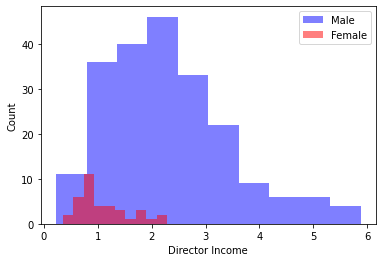

In [122]:
plt.hist(male_income['dirIncome'], alpha = 0.5, color = 'blue', label = 'Male')
plt.hist(female_income['dirIncome'],alpha = 0.5, color = 'red', label = 'Female')
plt.xlabel("Director Income")
plt.ylabel("Count")
plt.legend()
plt.show()

Histogram showing distribution in male director income (blue) and female director income (red).

### Question3. Plot the same data, using a boxplot, splitting by directorGender (? / 4 points)

<AxesSubplot:xlabel='dirGender', ylabel='dirIncome'>

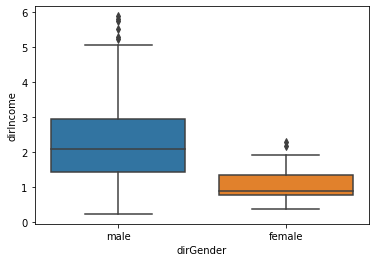

In [137]:
combined = df[['dirGender','dirIncome']]
sns.boxplot(x = combined['dirGender'], y = combined['dirIncome'])

Boxplot showing distribution in male director income (blue) and female director income (red).

### Question4. Plot the same data using a violin plot, splitting by director gender. (? / 4 points)

<AxesSubplot:xlabel='dirGender', ylabel='dirIncome'>

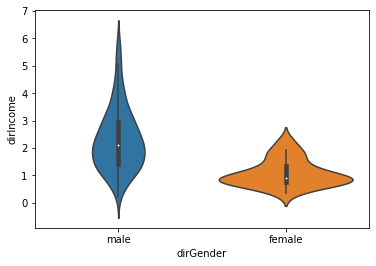

In [134]:
sns.violinplot(x = combined['dirGender'], y = combined['dirIncome'])

Violin plot showing distribution in male director income (blue) and female director income (red).

### Question5. Make a boxplot of director income split by movie genre. (? /4 points)

<AxesSubplot:xlabel='genre', ylabel='dirIncome'>

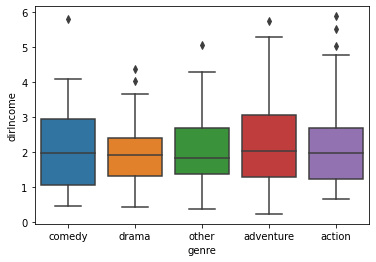

In [136]:
genres = df[['genre','dirIncome']]
sns.boxplot(x = genres['genre'], y = genres['dirIncome'])

Boxplot showing distribution in director income based on movie genre.

### Question6. Make a violinplotof director income split by movie genre (? / 4 points)

<AxesSubplot:xlabel='genre', ylabel='dirIncome'>

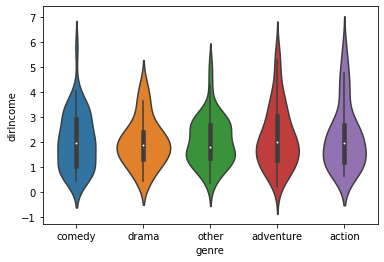

In [139]:
sns.violinplot(x = genres['genre'], y = genres['dirIncome'])

Violin plot showing distribution in director income based on movie genre.